# preprocess images

*imports*

In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

*method for displaying an image*

In [2]:
def print_img(img, color=True):
    plt.figure(figsize=(10, 6) )
    if (color):
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) ) # color
    else:
        plt.imshow(img, cmap="gray") # grayscale
    plt.show()
    
    
def filter_contours(img_contours, min_val=100, max_val=400):
    new_cont_list = []
    for contour in img_contours:
        if len(contour) > min_val and len(contour) < max_val:
            new_cont_list.append(contour)
    return np.array(new_cont_list)

*image path*

In [46]:
img_in_resize_path = "../images/resized_adidas-inside-012.jpg"
img_out_resize_path = "../images/resized_adidas-outside-012.jpg"

img_in_resize = cv2.imread(img_in_resize_path)
img_out_resize = cv2.imread(img_out_resize_path)

#print_img(img_in_resize)
#print_img(img_out_resize)

*convert to grayscale*

In [8]:
img_in_gray = cv2.cvtColor(img_in_resize, cv2.COLOR_BGR2GRAY)
img_out_gray = cv2.cvtColor(img_out_resize, cv2.COLOR_BGR2GRAY)

#print_img(img_in_gray, False) # print grayscale
#print_img(img_out_gray, False) # print grayscale

*apply threshold*

In [9]:
ret_in, img_in_thresh = cv2.threshold(img_in_gray, 127, 255, cv2.THRESH_TOZERO)
ret_out, img_out_thresh = cv2.threshold(img_out_gray, 127, 255, cv2.THRESH_TOZERO)

#print_img(img_in_thresh, False)
#print_img(img_out_thresh, False)

*find contours*

In [10]:
img_in_c, img_in_contours, img_in_heirarchy = cv2.findContours(img_in_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_out_c, img_out_contours, img_out_heirarchy = cv2.findContours(img_out_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_in_copy = img_in_resize.copy()
img_out_copy = img_out_resize.copy()

*display contours*

In [49]:
img_in_copy = img_in_resize.copy()
img_out_copy = img_out_resize.copy()

'''
PartOfShoe:ContourNumber(ContourAreaSize)
change -1 in cv2.drawContours() params BELOW to ContourNumber to draw just that Contour
'''

# ALL:6(365), Front:9(70), Mid:10(57), Rear:11(73)
cv2.drawContours(img_in_copy, img_in_contours, -1, [0, 255, 0], 2)
# ALL:11(362), Front:26(54), Mid:28(78), Rear:29(67)
cv2.drawContours(img_out_copy, img_out_contours, -1, [0, 255, 0], 2)

#print_img(img_in_copy)
#print_img(img_out_copy)
print()

*try filtering contours*

In [51]:
img_in_copy = img_in_resize.copy()
img_out_copy = img_out_resize.copy()

img_in_cont_filter = filter_contours(img_in_contours, 100, 375) # 100 - 375 arbitrary val
img_out_cont_filter = filter_contours(img_out_contours, 100, 375) # 100 - 375 arbitrary val

cv2.drawContours(img_in_copy, img_in_cont_filter, -1, [0, 255, 0], 2) # filtered contours
cv2.drawContours(img_out_copy, img_out_cont_filter, -1, [0, 255, 0], 2) # filtered contours

#print_img(img_in_copy)
#print_img(img_out_copy)
print()

*box methods*

In [52]:
# return a list of coordinates that bound a rectangle box around every contour
def create_all_boxes(img_cont_list):
    box_list = []
    for contour in img_cont_list:
        cv2.boundingRect(contour)
        box_list.append(contour)
    return box_list

# filter out rectangle boxes based on filter_size
def filter_boxes(img_rect_list, filter_size=0):
    filtered_boxes = []
    for rectangle in img_rect_list:
        if(rectangle[2] * rectangle[3] > filter_size):
            filtered_boxes.append(rectangle)
    return filtered_boxes

# draw rectangle boxes of contours on image
def draw_rectangles(img, img_rect_list, x_offset=0, y_offset=0):
    for x, y, w, h in img_rect_list:
        cv2.rectangle(
            img,
            (x - x_offset, y - y_offset),
            ( (x + x_offset) + w, (y + y_offset) + h),
            (0, 255, 0),
            2
        )

*create/get coordinates of boxes around each contour*

In [53]:
img_in_all_boxes = [cv2.boundingRect(c) for c in img_in_contours]
img_in_filter_boxes = filter_boxes(img_in_all_boxes, box_filter_size)

img_out_all_boxes = [cv2.boundingRect(c) for c in img_out_contours]
img_out_filter_boxes = filter_boxes(img_out_all_boxes, box_filter_size)

In [54]:
print(len(img_in_filter_boxes))
print(len(img_out_filter_boxes))

5
5


*now draw the boxes on the original images*

In [55]:
img_in_copy2 = img_in_resize.copy()
img_out_copy2 = img_out_resize.copy()

draw_rectangles(img_in_copy2, img_in_filter_boxes)
draw_rectangles(img_out_copy2, img_out_filter_boxes)

#print_img(img_in_copy2)
#print_img(img_out_copy2)

*now try drawing a box around filtered contours from earlier above*

In [37]:
img_in_all_boxes = [cv2.boundingRect(c) for c in img_in_cont_filter] # use filtered contours
img_in_filter_boxes = filter_boxes(img_in_all_boxes, box_filter_size)

img_out_all_boxes = [cv2.boundingRect(c) for c in img_out_cont_filter] # use filtered contours
img_out_filter_boxes = filter_boxes(img_out_all_boxes, box_filter_size)

In [38]:
print(len(img_in_filter_boxes))
print(len(img_out_filter_boxes))

1
1


In [56]:
img_in_copy2 = img_in_resize.copy()
img_out_copy2 = img_out_resize.copy()

draw_rectangles(img_in_copy2, img_in_filter_boxes)
draw_rectangles(img_out_copy2, img_out_filter_boxes)

#print_img(img_in_copy2)
#print_img(img_out_copy2)

# Trying same process from above on white shoes now

In [176]:
img_in_resize_path = "../images/resized_adidas-inside-00.jpg"
img_out_resize_path = "../images/resized_adidas-outside-00.jpg"

img_in_resize = cv2.imread(img_in_resize_path)
img_out_resize = cv2.imread(img_out_resize_path)

#print_img(img_in_resize)
#print_img(img_out_resize)

In [177]:
img_in_gray = cv2.cvtColor(img_in_resize, cv2.COLOR_BGR2GRAY)
img_out_gray = cv2.cvtColor(img_out_resize, cv2.COLOR_BGR2GRAY)

#print_img(img_in_gray, False) # print grayscale
#print_img(img_out_gray, False) # print grayscale

*apply thresholding*

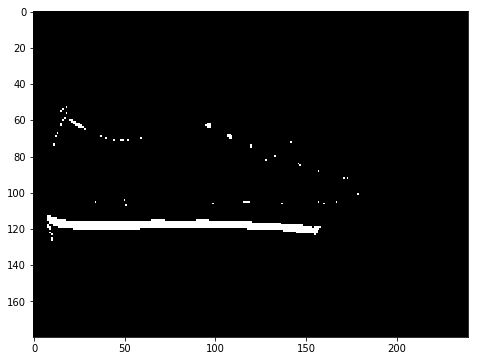

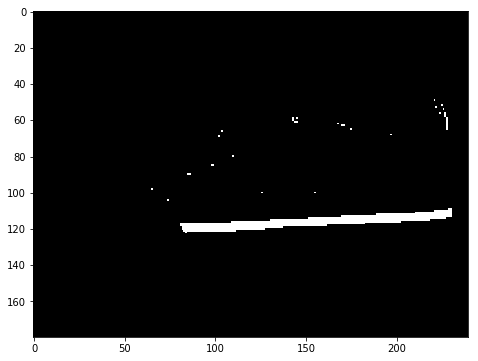

In [231]:
#ret_in, img_in_thresh = cv2.threshold(img_in_gray, 127, 255, cv2.THRESH_BINARY_INV)
#ret_out, img_out_thresh = cv2.threshold(img_out_gray, 127, 255, cv2.THRESH_BINARY_INV)

ret_in, img_in_thresh = cv2.threshold(img_in_gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret_out, img_out_thresh = cv2.threshold(img_out_gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


print_img(img_in_thresh, False)
print_img(img_out_thresh, False)

*trying adaptive thresholding instead*

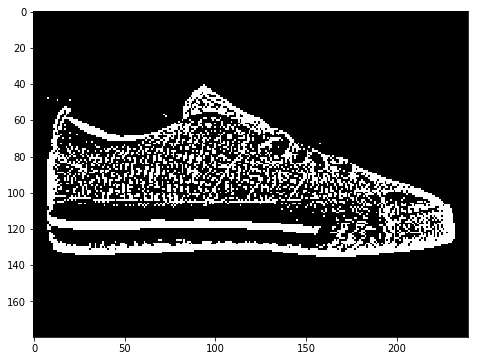

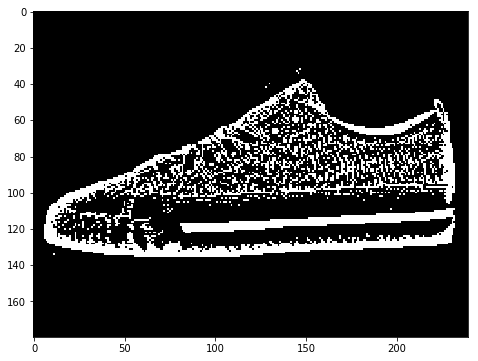

In [252]:
#blur = cv2.GaussianBlur(img_in_gray, (5, 5), 0)

img_in_thresh = cv2.adaptiveThreshold(img_in_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 23, 2)
img_out_thresh = cv2.adaptiveThreshold(img_out_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 23, 2)

#print_img(blur, False)

print_img(img_in_thresh, False)
print_img(img_out_thresh, False)

*calc contours for adaptive thresholding*

In [253]:

img_in_c, img_in_contours, img_in_heirarchy = cv2.findContours(img_in_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_out_c, img_out_contours, img_out_heirarchy = cv2.findContours(img_out_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(img_in_contours))
print(len(img_out_contours))


457
413


In [254]:
img_in_filt = filter_contours(img_in_contours, 200, 700)
img_out_filt = filter_contours(img_out_contours, 200, 700)

print(len(img_in_filt))
print(len(img_out_filt))


4
2


*draw contours*

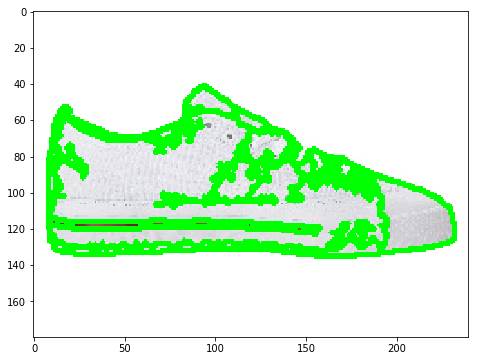

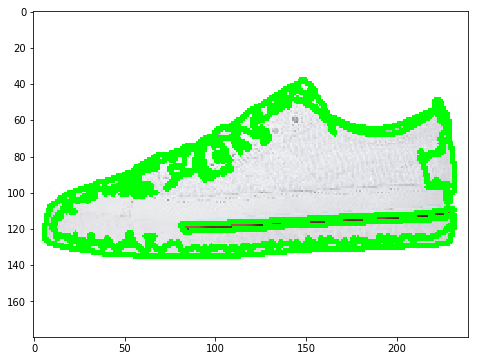

In [255]:
img_in_copy = img_in_resize.copy()
img_out_copy = img_out_resize.copy()

#cv2.drawContours(img_in_copy, img_in_contours, -1, [0, 255, 0], 2)
#cv2.drawContours(img_out_copy, img_out_contours, -1, [0, 255, 0], 2)

cv2.drawContours(img_in_copy, img_in_filt, -1, [0, 255, 0], 2)
cv2.drawContours(img_out_copy, img_out_filt, -1, [0, 255, 0], 2)

print_img(img_in_copy)
print_img(img_out_copy)

*trying canny edge detection*

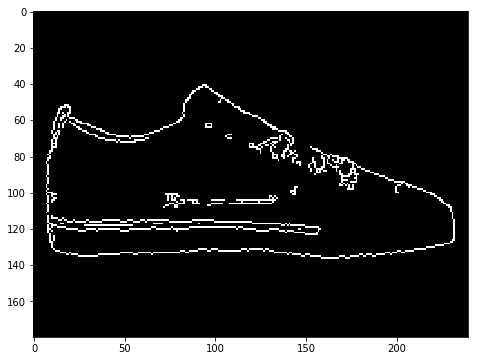

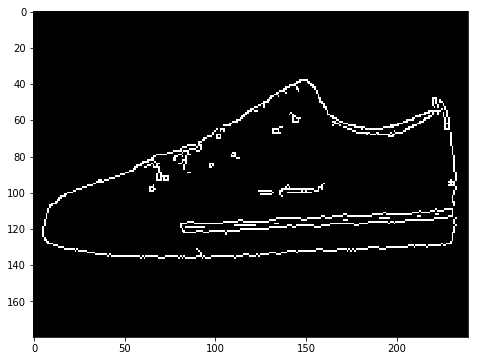

In [256]:
img_in_copy2 = img_in_resize.copy()
img_out_copy2 = img_out_resize.copy()

img_in_gray = cv2.cvtColor(img_in_resize, cv2.COLOR_BGR2GRAY)
img_out_gray = cv2.cvtColor(img_out_resize, cv2.COLOR_BGR2GRAY)


edge_in = cv2.Canny(img_in_gray, 50, 200)
edge_out = cv2.Canny(img_out_gray, 50, 200)

print_img(edge_in, False) # print grayscale
print_img(edge_out, False) # print grayscale

*checking out contours*

In [257]:
img_in_c, img_in_contours, img_in_heirarchy = cv2.findContours(edge_in, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_out_c, img_out_contours, img_out_heirarchy = cv2.findContours(edge_out, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

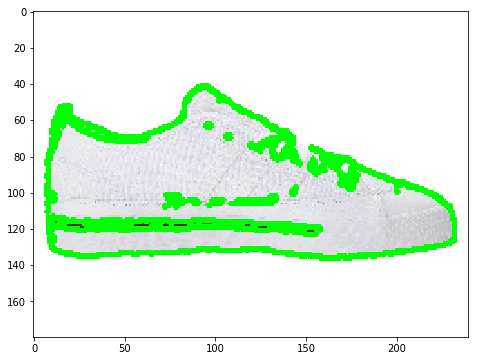

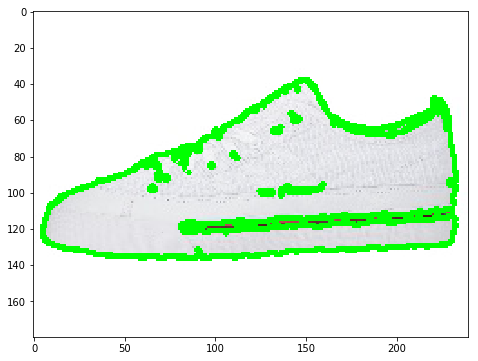

In [258]:
img_in_copy = img_in_resize.copy()
img_out_copy = img_out_resize.copy()


cv2.drawContours(img_in_copy, img_in_contours, -1, [0, 255, 0], 2)
cv2.drawContours(img_out_copy, img_out_contours, -1, [0, 255, 0], 2)

print_img(img_in_copy)
print_img(img_out_copy)
print()

In [259]:
img_in_all_boxes = [cv2.boundingRect(c) for c in img_in_contours]
img_in_filter_boxes = filter_boxes(img_in_all_boxes, box_filter_size)

img_out_all_boxes = [cv2.boundingRect(c) for c in img_out_contours]
img_out_filter_boxes = filter_boxes(img_out_all_boxes, box_filter_size)

In [260]:
print(img_in_filter_boxes)
print(img_out_filter_boxes)

[(8, 75, 225, 62), (20, 61, 44, 12), (7, 41, 137, 71)]
[(81, 109, 151, 15), (81, 109, 151, 14), (5, 65, 229, 72), (105, 38, 121, 32)]


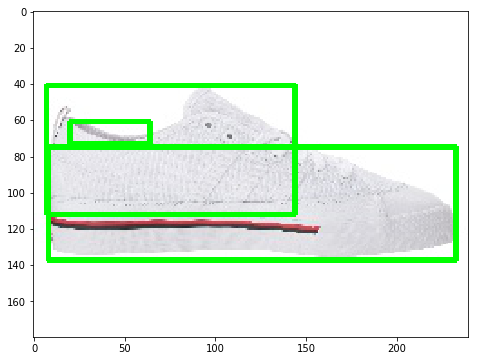

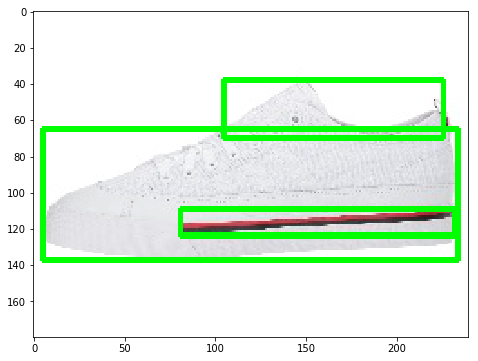

In [261]:
img_in_copy2 = img_in_resize.copy()
img_out_copy2 = img_out_resize.copy()

draw_rectangles(img_in_copy2, img_in_filter_boxes)
draw_rectangles(img_out_copy2, img_out_filter_boxes)

print_img(img_in_copy2)
print_img(img_out_copy2)

*try filtering contours then draw*

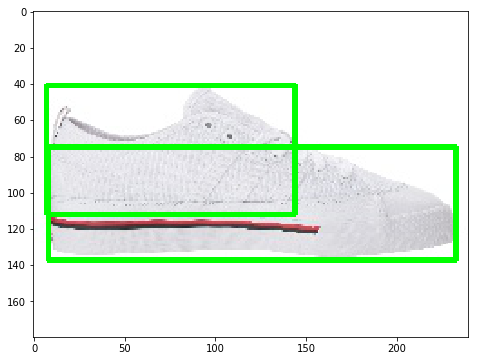

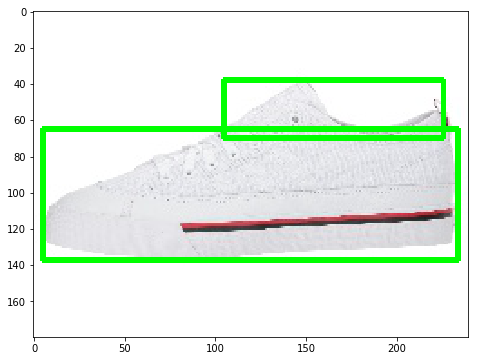

In [273]:
img_in_copy2 = img_in_resize.copy()
img_out_copy2 = img_out_resize.copy()

img_in_cont_filter = filter_contours(img_in_contours, 100, 700) # 100 - 375 arbitrary val
img_out_cont_filter = filter_contours(img_out_contours, 100, 700) # 100 - 375 arbitrary val

img_in_all_boxes = [cv2.boundingRect(c) for c in img_in_cont_filter]
img_in_filter_boxes = filter_boxes(img_in_all_boxes, box_filter_size)

img_out_all_boxes = [cv2.boundingRect(c) for c in img_out_cont_filter]
img_out_filter_boxes = filter_boxes(img_out_all_boxes, box_filter_size)

draw_rectangles(img_in_copy2, img_in_filter_boxes)
draw_rectangles(img_out_copy2, img_out_filter_boxes)

print_img(img_in_copy2)
print_img(img_out_copy2)

In [274]:
print(len(img_in_contours))
print(len(img_in_cont_filter))

print()

print(len(img_out_contours))
print(len(img_out_cont_filter))


45
2

41
2


In [272]:
for i in img_in_contours:
    if len(i) > 100:
        print(len(i))

print()
for i in img_out_contours:
    if len(i) > 80:
        print(len(i))

641
287

98
97
425
249
